# 2. Data preparation

---

### Setup

In [1]:
import sys
sys.path.insert(1, '../../utils')

import pandas as pd

original: pd.DataFrame = pd.read_csv('../heart_failure_clinical_records_dataset_after_profiling.csv', sep=';')

cols_nr = original.select_dtypes(include='number')
cols_sb = original.select_dtypes(include='bool')

original.describe()
original.to_csv('data/n_prepared.csv', sep=';', index=False)

## 2.0. Data preparation

---

### Missing Values Imputation

---

In [2]:
df_nr = cols_nr
df_sb = cols_sb

### Outliers Imputation
---

In [3]:
#TODO

### Scaling

---

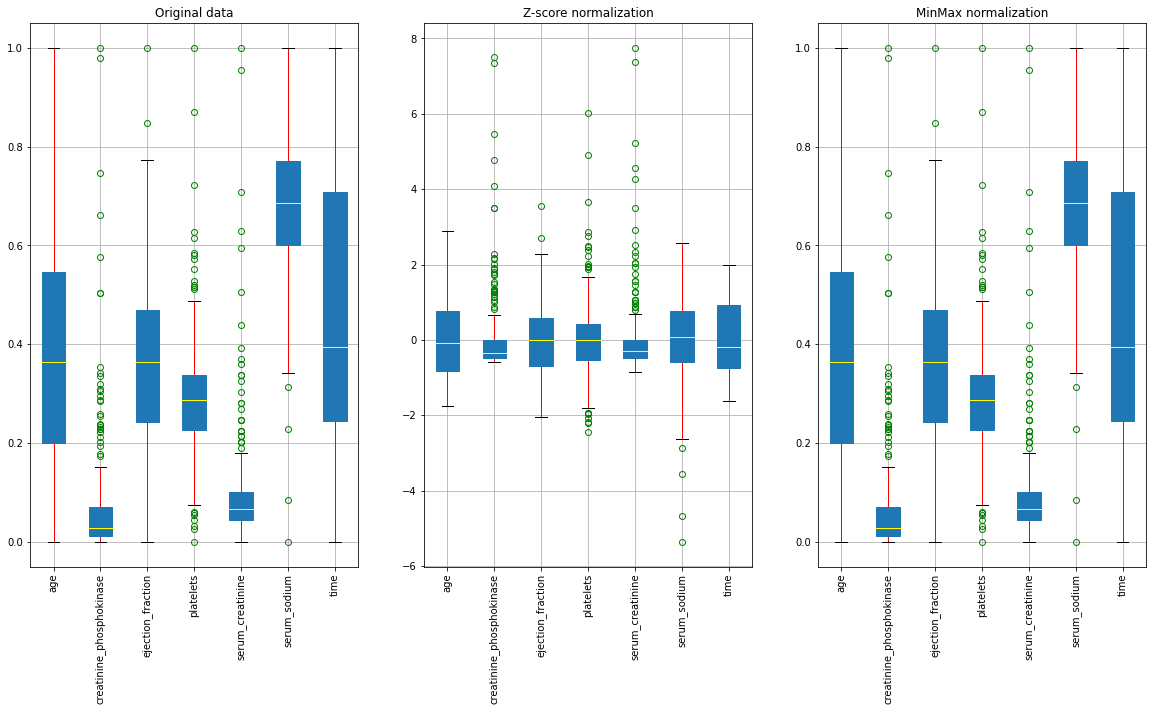

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_zscore = df_nr

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = df_nr

import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 1, ncols=3, figsize=(20, 10),squeeze=False)
axs[0, 0].set_title('Original data')
df_nr.boxplot(ax=axs[0, 0], rot=90, patch_artist=True, whiskerprops=dict(color='red'), medianprops=dict(color='yellow'), flierprops=dict(color='green', markeredgecolor='green'))
axs[0, 1].set_title('Z-score normalization')
norm_data_zscore.boxplot(ax=axs[0, 1], rot=90, patch_artist=True, whiskerprops=dict(color='red'), medianprops=dict(color='yellow'), flierprops=dict(color='green', markeredgecolor='green'))
axs[0, 2].set_title('MinMax normalization')
norm_data_minmax.boxplot(ax=axs[0, 2], rot=90, patch_artist=True, whiskerprops=dict(color='red'), medianprops=dict(color='yellow'), flierprops=dict(color='green', markeredgecolor='green'))
plt.show()

In [5]:
# Rejoin numeric with symbolic variables
norm_data_zscore = norm_data_zscore.join(df_sb, how='right')
norm_data_minmax = norm_data_minmax.join(df_sb, how='right')

#TODO: experimentar com zscore depois tambem

In [6]:
# Finally, export prepared data to csv
norm_data_zscore.to_csv('data/prepared_zs.csv', sep=';', index=False)
norm_data_minmax.to_csv('data/prepared_mm.csv', sep=';', index=False)

### Feature Selection

---

#### Unsupervised Selection

By definition, unsupervised selection only aims for eliminating redundancies among the
variables, getting the smallest set possible.

In [7]:
import seaborn as sns
import numpy as np

df = [norm_data_zscore, norm_data_minmax]
data_dict_unsupervised = []

for i in range(len(df)):
    copy = df[i].copy(deep=True)
    copy = copy.drop('DEATH_EVENT', axis = 1)
    corrs = copy.corr()

    removed = []

    for x in corrs:
        for y in corrs:
            if x == y:
                break
            corr = corrs[x][y]
            if abs(corr) >= 0.8 and x not in removed and y not in removed:
                copy = copy.drop(x, axis=1)
                removed.append(x)
                break

    copy['DEATH_EVENT'] = df[i]['DEATH_EVENT']

    data_dict_unsupervised.append(copy.copy(deep=True))

In [8]:
data_dict_unsupervised[0].to_csv('data/prepared_s_zs.csv', sep=';', index=False)
data_dict_unsupervised[1].to_csv('data/prepared_s_mm.csv', sep=';', index=False)

### Summary

---

***Are all variables in the same scale? If not, how does scaling impact the results?***



***Is the dataset unbalanced? If yes, what is the best balancing technique to apply?***

